In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline

In [46]:
df=pd.read_csv('D:/Downloads/Week/Week 2/breast-cancer.csv')
df.head(10)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
5,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440
6,844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,...,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368
7,84458202,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,...,17.06,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510
8,844981,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,...,15.49,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720
9,84501001,M,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,...,15.09,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750


In [47]:
df.shape

(569, 32)

In [48]:
df=df.drop(columns=['id'])

In [28]:
df.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


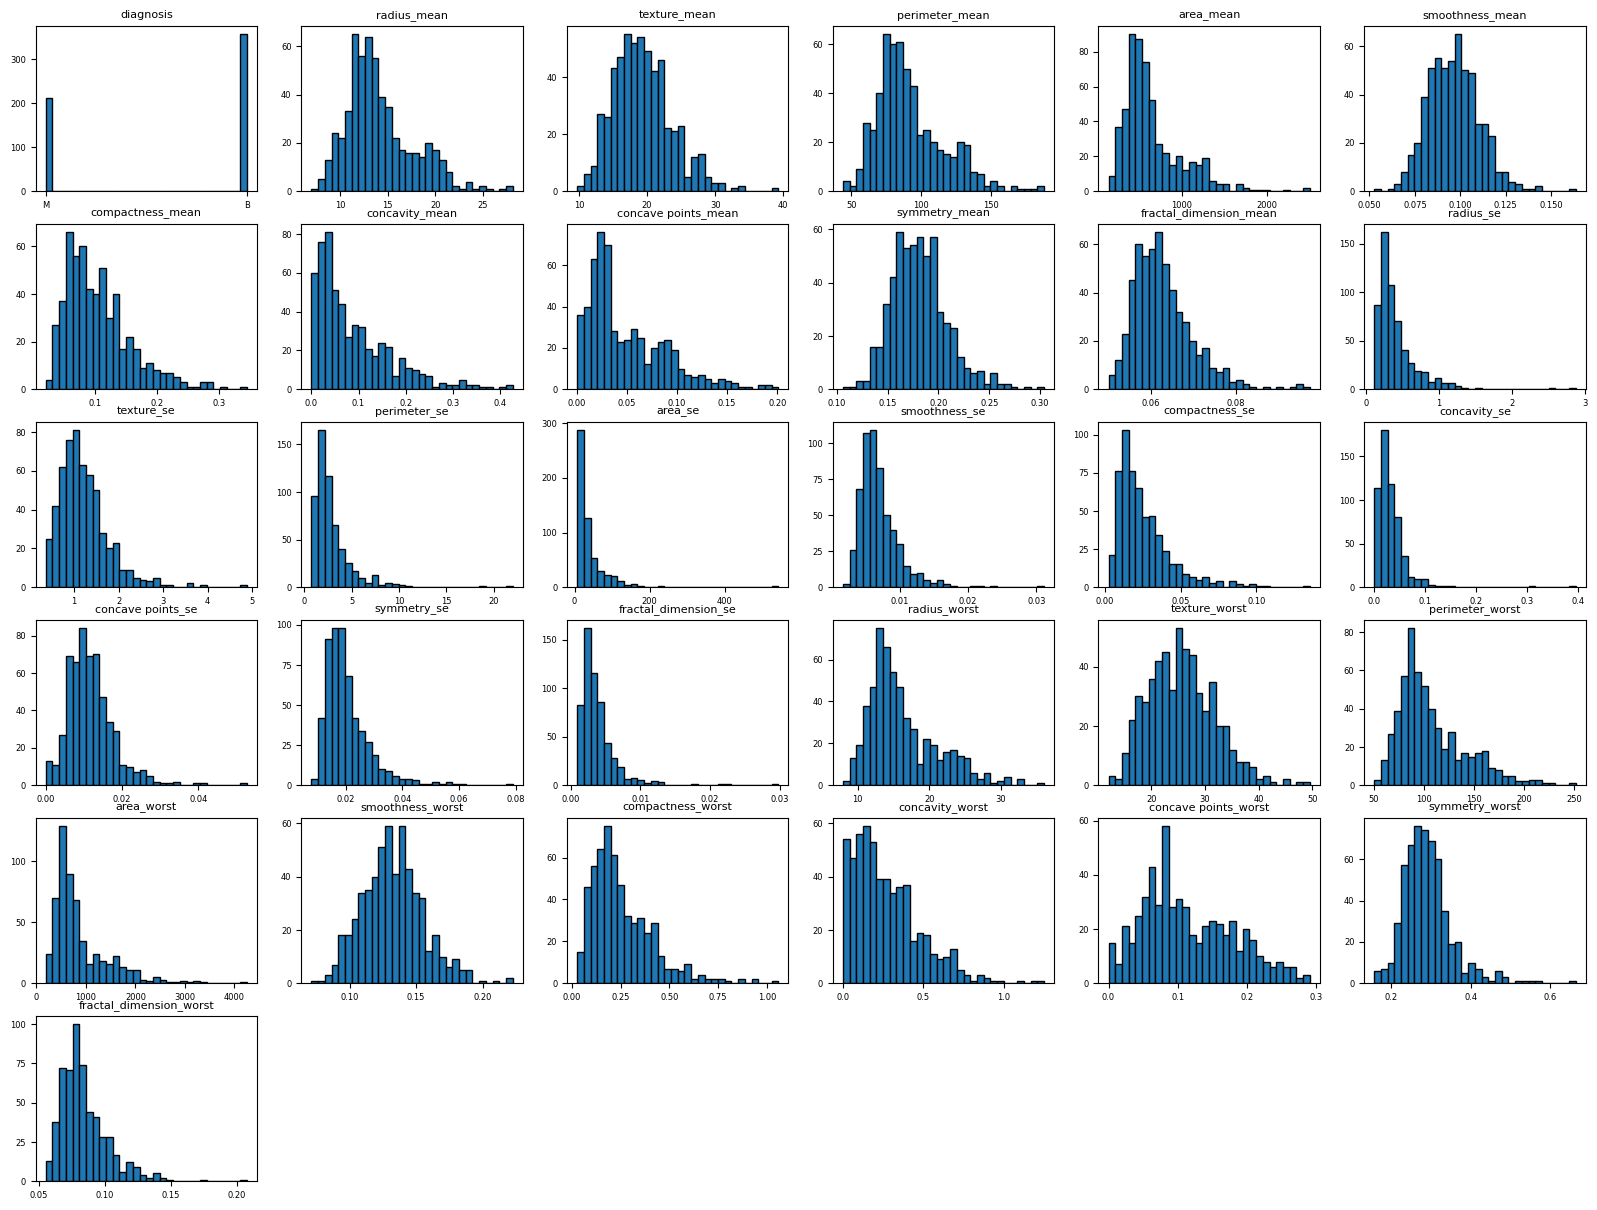

In [38]:
plt.figure(figsize=(20, 15))

for i, col in enumerate(df.columns):
    plt.subplot(6, 6, i + 1)  
    plt.hist(df[col], bins=30,  edgecolor='black')
    plt.title(col, fontsize=8)
    plt.xticks(fontsize=6)
    plt.yticks(fontsize=6)
plt.show()

In [53]:
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})


In [9]:
df.head(10)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
5,1,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440
6,1,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,...,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368
7,1,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,...,17.06,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510
8,1,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,0.2350,...,15.49,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720
9,1,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,0.2030,...,15.09,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750


In [49]:
df.duplicated().sum()

np.int64(0)

In [41]:
df.isnull().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [12]:
df.dtypes

diagnosis                    int64
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst            float64
concave points_worst

C:\Users\Dell\AppData\Local\Temp\ipykernel_7592\3408208058.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot( y=df[feature], palette=("coolwarm"))


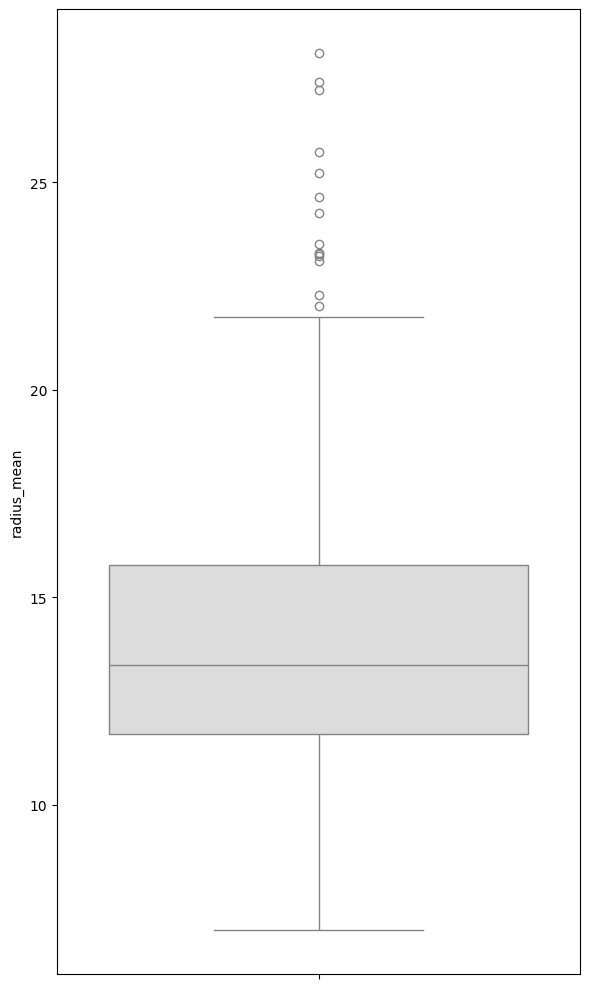

C:\Users\Dell\AppData\Local\Temp\ipykernel_7592\3408208058.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot( y=df[feature], palette=("coolwarm"))


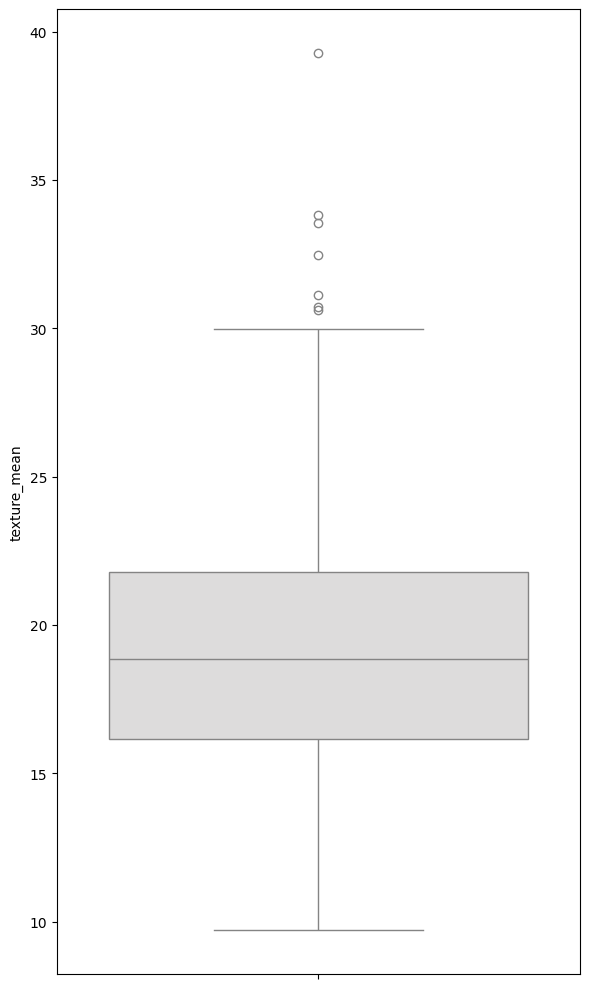

C:\Users\Dell\AppData\Local\Temp\ipykernel_7592\3408208058.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot( y=df[feature], palette=("coolwarm"))


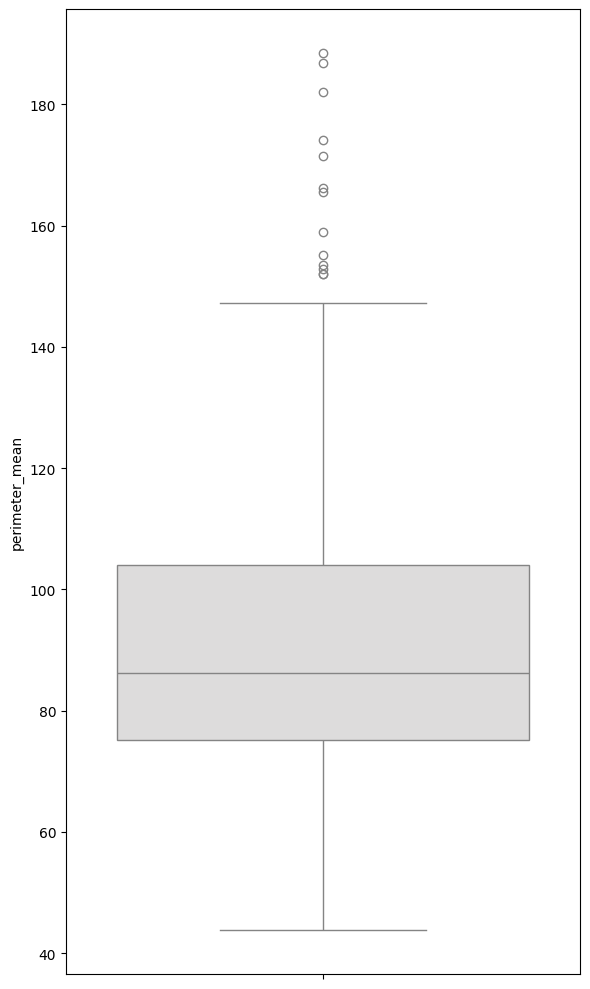

C:\Users\Dell\AppData\Local\Temp\ipykernel_7592\3408208058.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot( y=df[feature], palette=("coolwarm"))


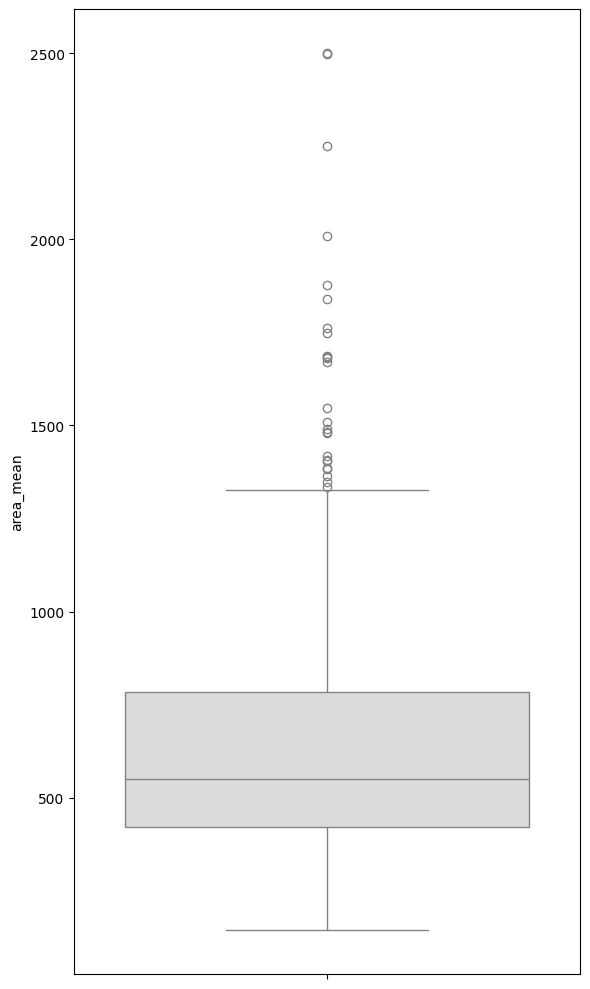

C:\Users\Dell\AppData\Local\Temp\ipykernel_7592\3408208058.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot( y=df[feature], palette=("coolwarm"))


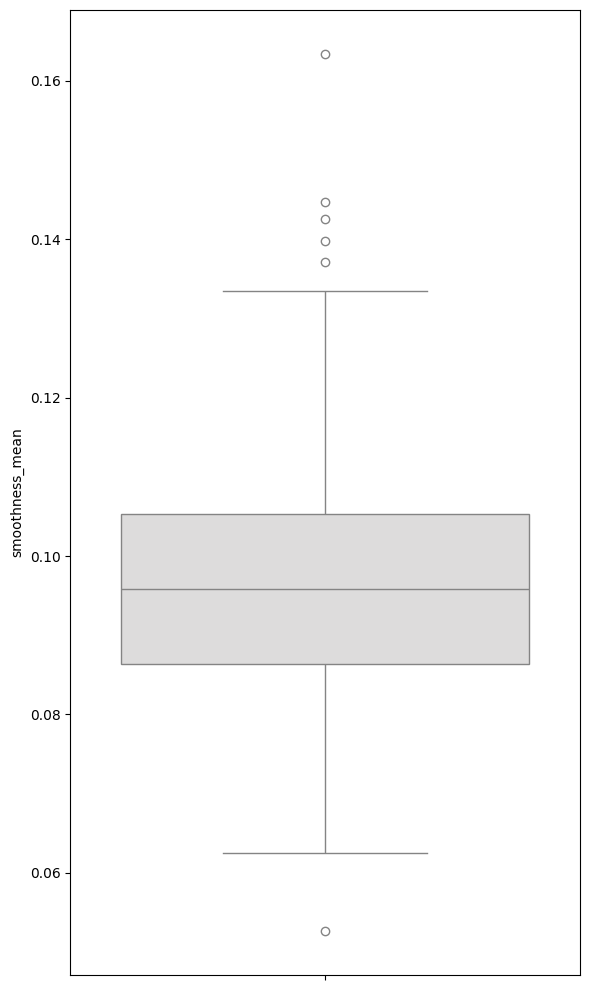

C:\Users\Dell\AppData\Local\Temp\ipykernel_7592\3408208058.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot( y=df[feature], palette=("coolwarm"))


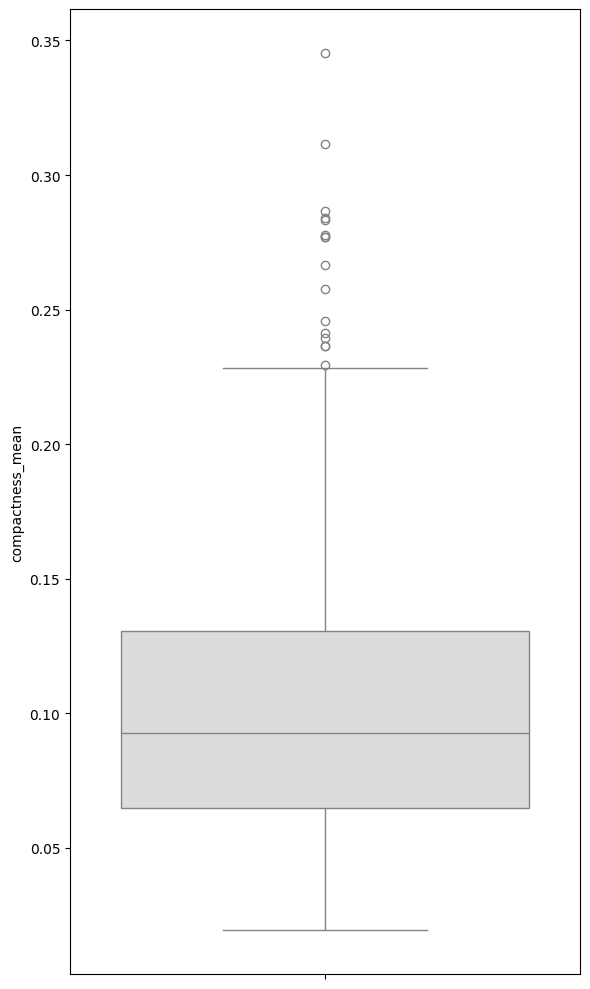

C:\Users\Dell\AppData\Local\Temp\ipykernel_7592\3408208058.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot( y=df[feature], palette=("coolwarm"))


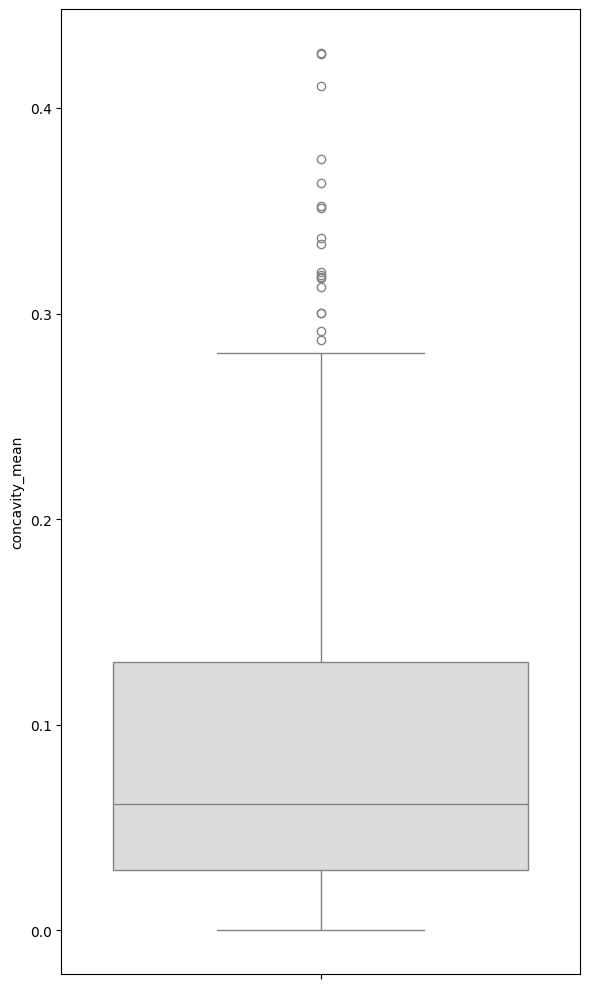

C:\Users\Dell\AppData\Local\Temp\ipykernel_7592\3408208058.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot( y=df[feature], palette=("coolwarm"))


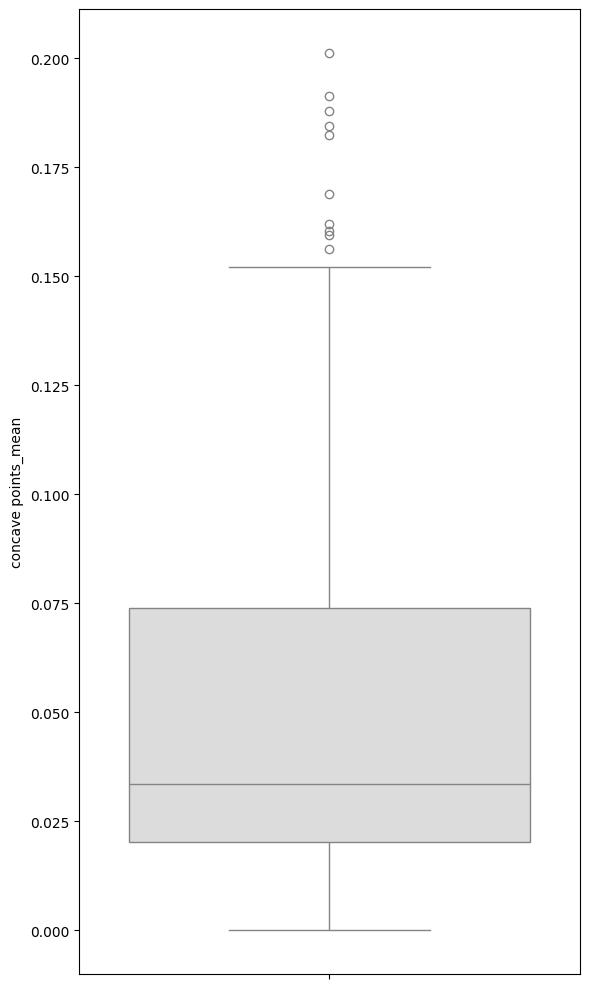

C:\Users\Dell\AppData\Local\Temp\ipykernel_7592\3408208058.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot( y=df[feature], palette=("coolwarm"))


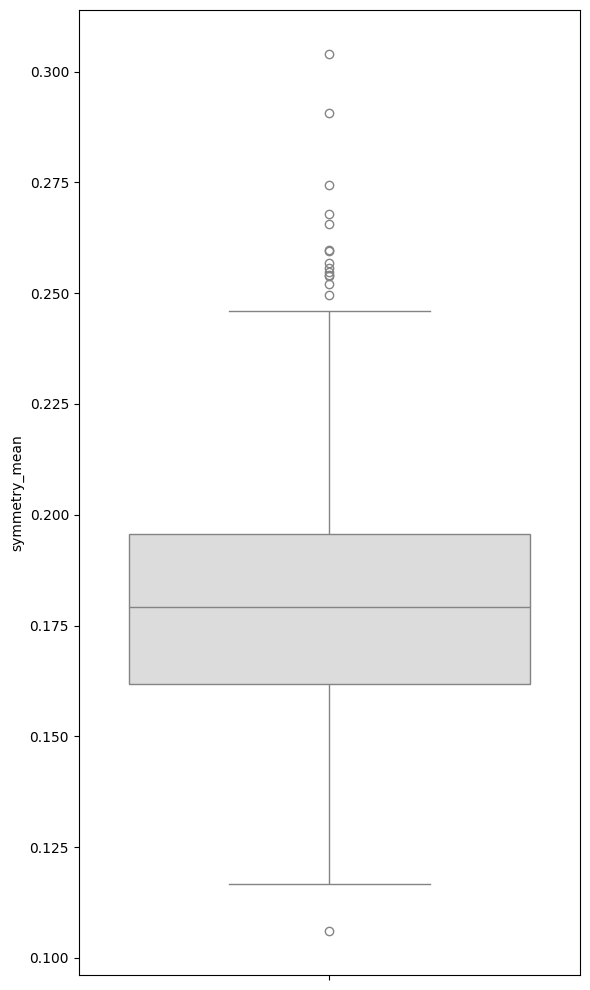

C:\Users\Dell\AppData\Local\Temp\ipykernel_7592\3408208058.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot( y=df[feature], palette=("coolwarm"))


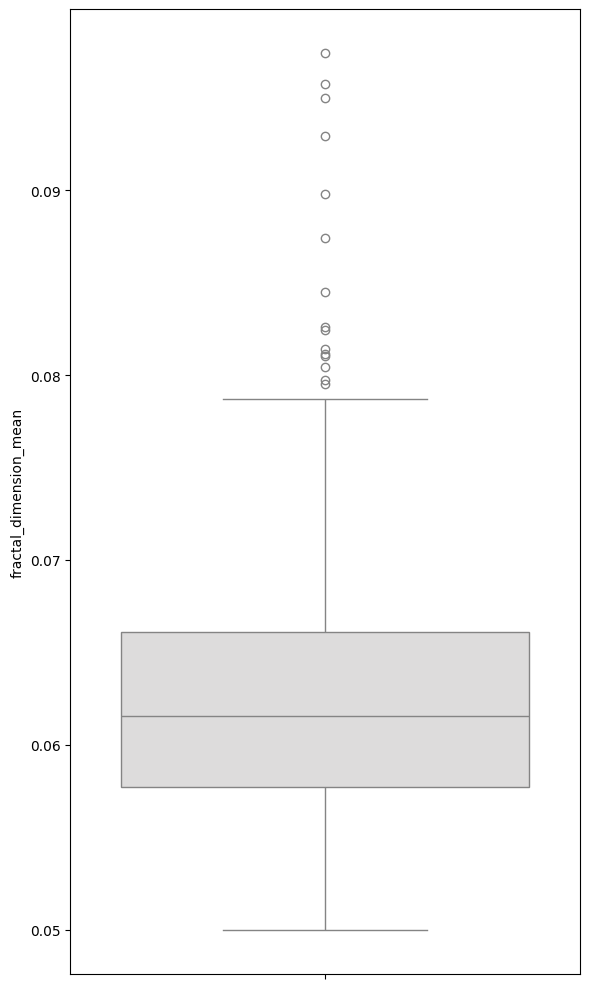

C:\Users\Dell\AppData\Local\Temp\ipykernel_7592\3408208058.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot( y=df[feature], palette=("coolwarm"))


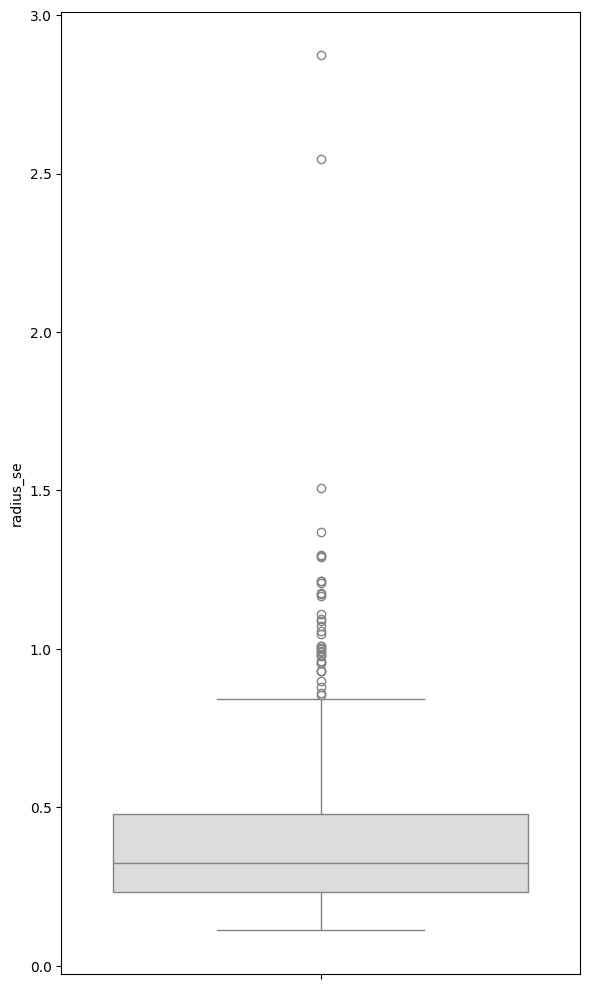

C:\Users\Dell\AppData\Local\Temp\ipykernel_7592\3408208058.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot( y=df[feature], palette=("coolwarm"))


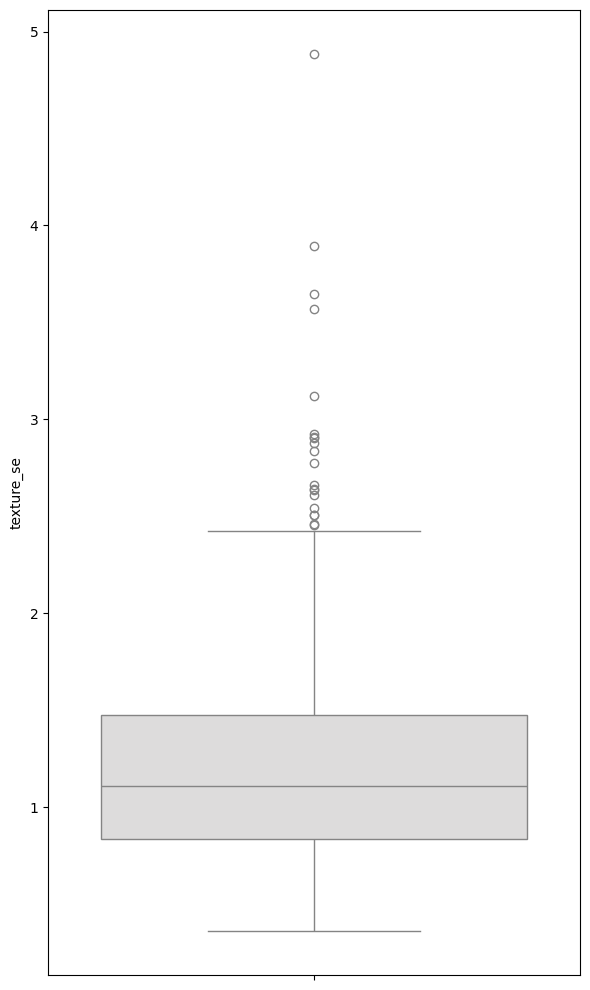

C:\Users\Dell\AppData\Local\Temp\ipykernel_7592\3408208058.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot( y=df[feature], palette=("coolwarm"))


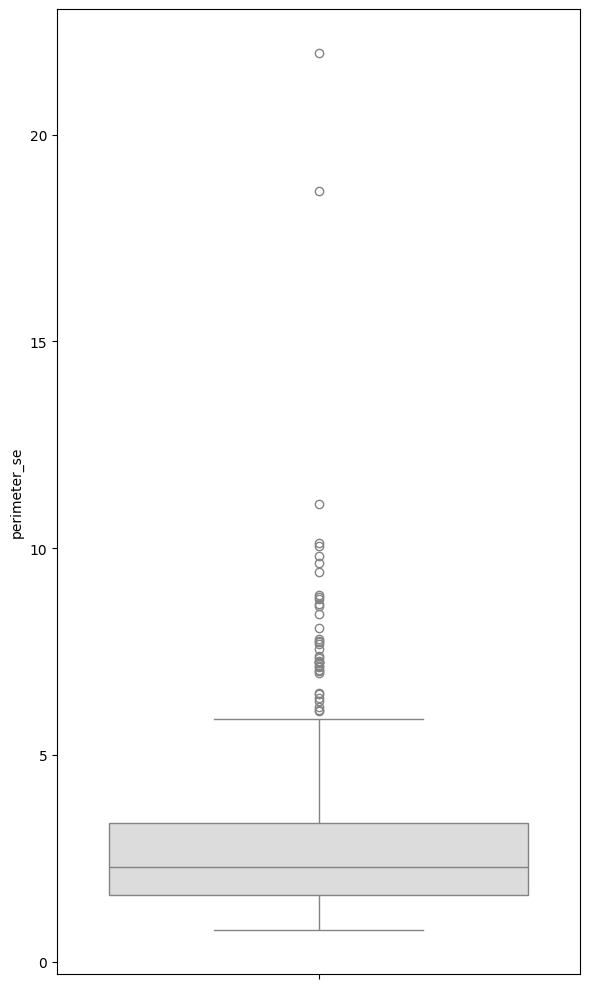

C:\Users\Dell\AppData\Local\Temp\ipykernel_7592\3408208058.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot( y=df[feature], palette=("coolwarm"))


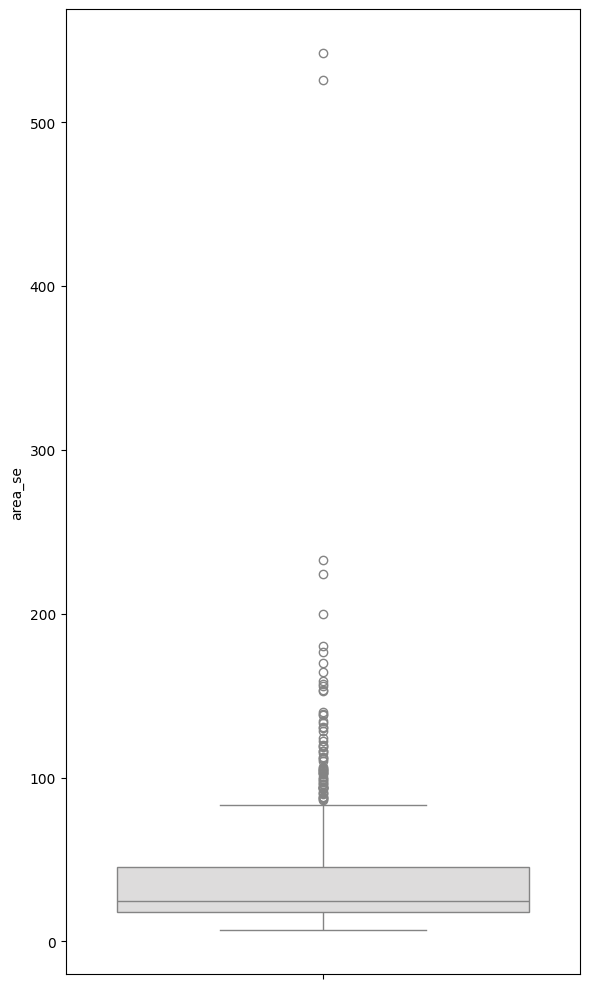

C:\Users\Dell\AppData\Local\Temp\ipykernel_7592\3408208058.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot( y=df[feature], palette=("coolwarm"))


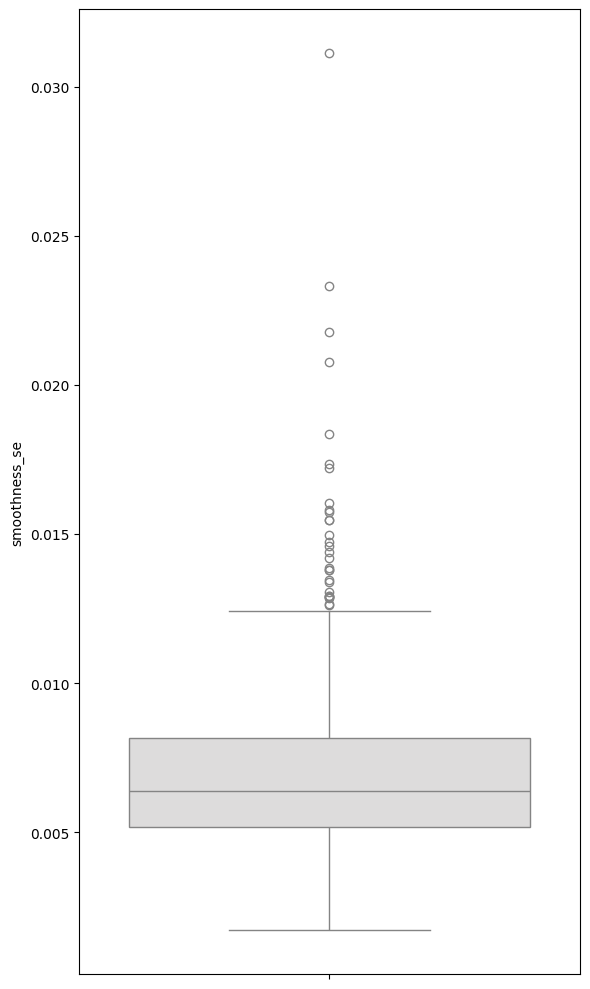

C:\Users\Dell\AppData\Local\Temp\ipykernel_7592\3408208058.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot( y=df[feature], palette=("coolwarm"))


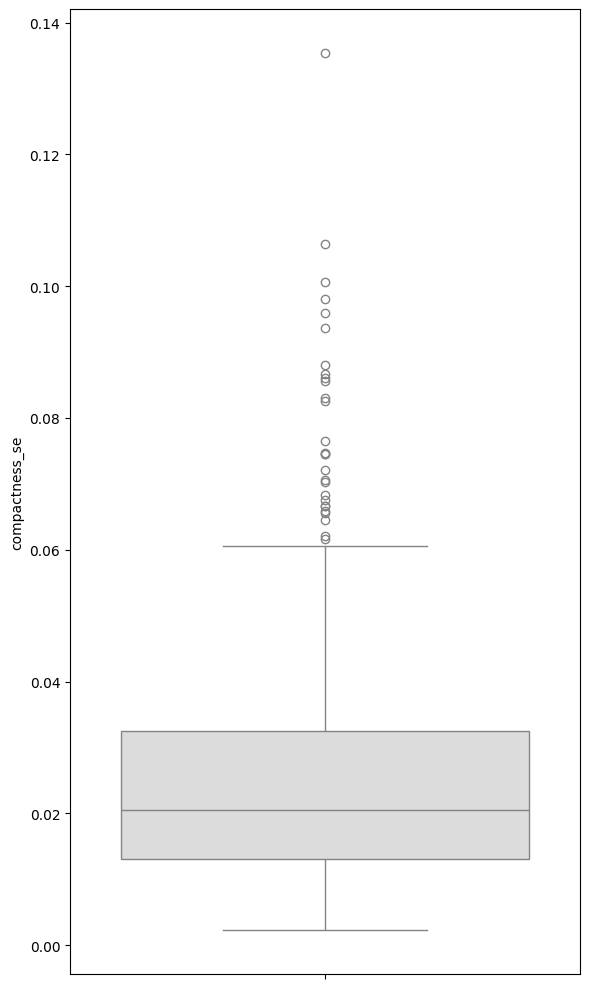

C:\Users\Dell\AppData\Local\Temp\ipykernel_7592\3408208058.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot( y=df[feature], palette=("coolwarm"))


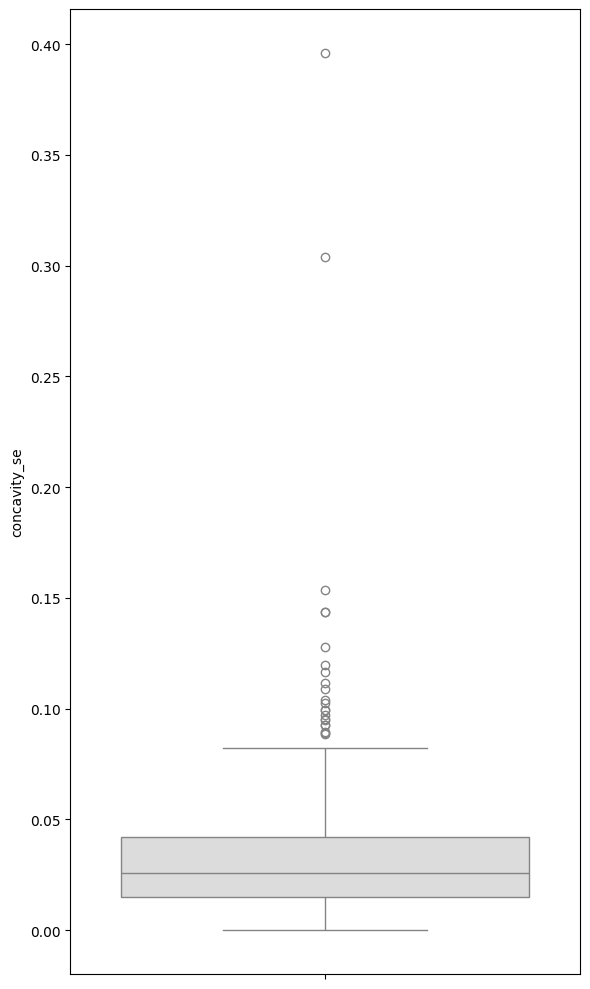

C:\Users\Dell\AppData\Local\Temp\ipykernel_7592\3408208058.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot( y=df[feature], palette=("coolwarm"))


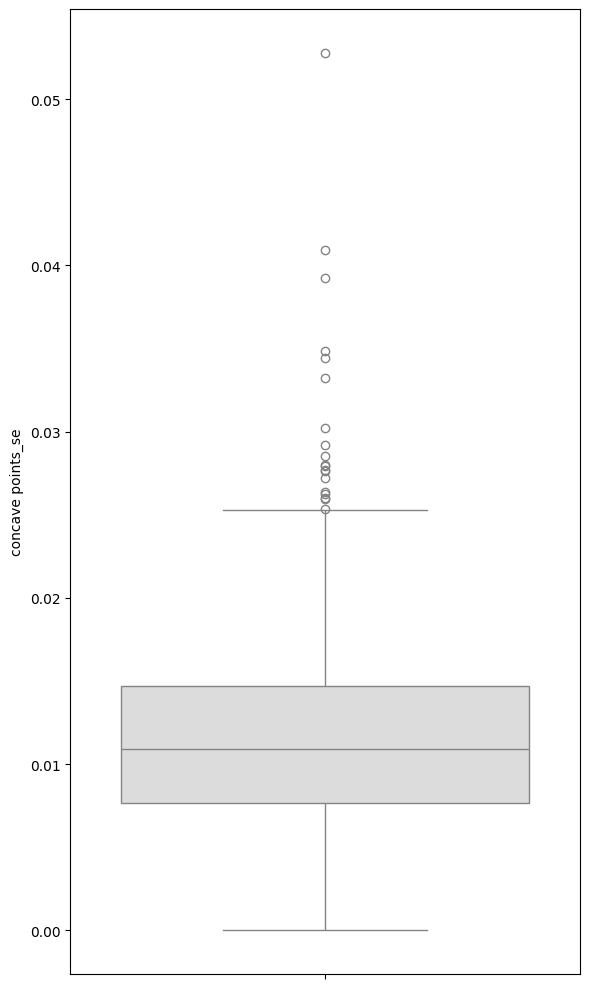

C:\Users\Dell\AppData\Local\Temp\ipykernel_7592\3408208058.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot( y=df[feature], palette=("coolwarm"))


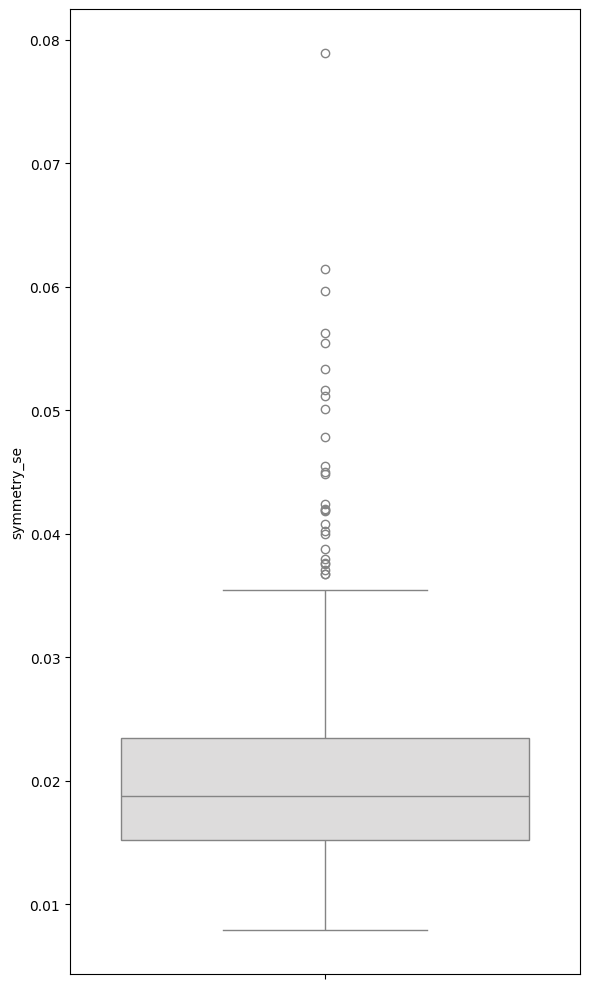

C:\Users\Dell\AppData\Local\Temp\ipykernel_7592\3408208058.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot( y=df[feature], palette=("coolwarm"))


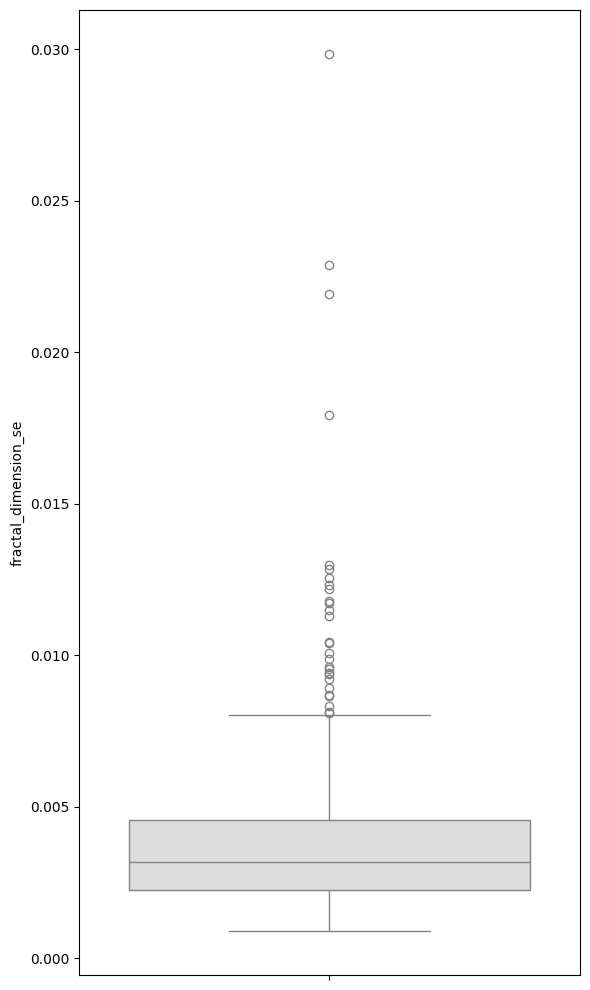

C:\Users\Dell\AppData\Local\Temp\ipykernel_7592\3408208058.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot( y=df[feature], palette=("coolwarm"))


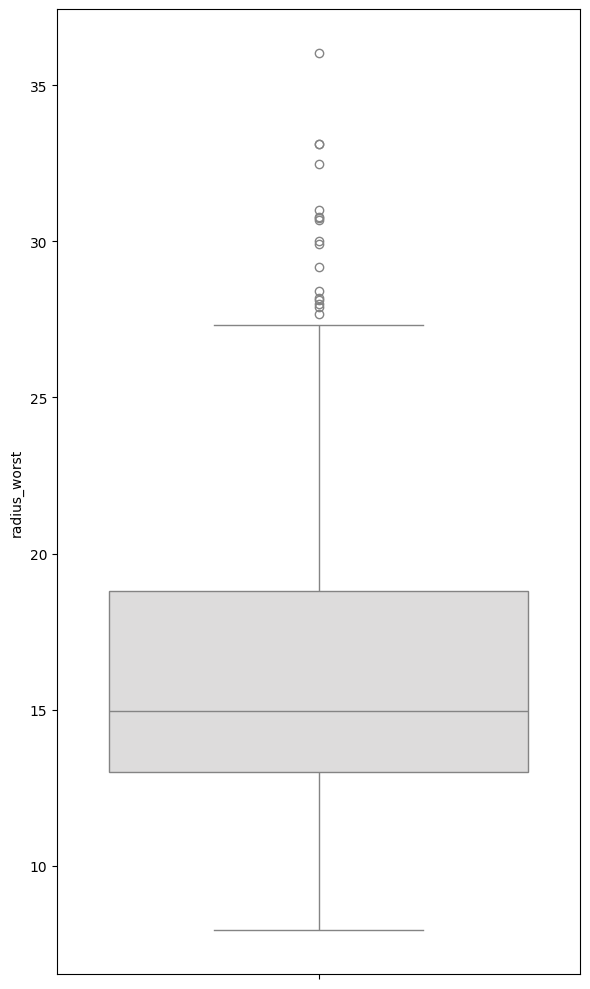

C:\Users\Dell\AppData\Local\Temp\ipykernel_7592\3408208058.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot( y=df[feature], palette=("coolwarm"))


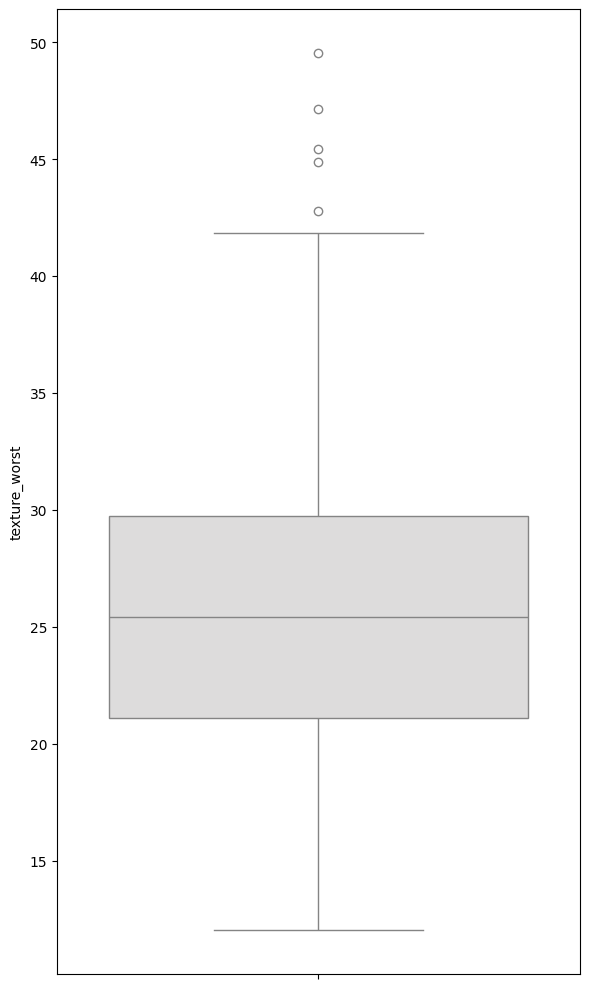

C:\Users\Dell\AppData\Local\Temp\ipykernel_7592\3408208058.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot( y=df[feature], palette=("coolwarm"))


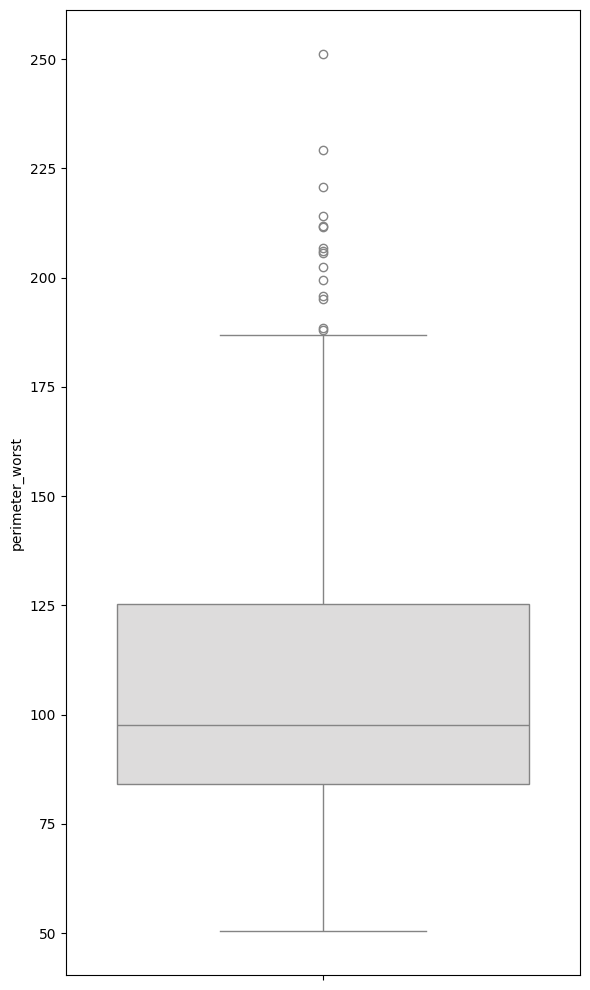

C:\Users\Dell\AppData\Local\Temp\ipykernel_7592\3408208058.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot( y=df[feature], palette=("coolwarm"))


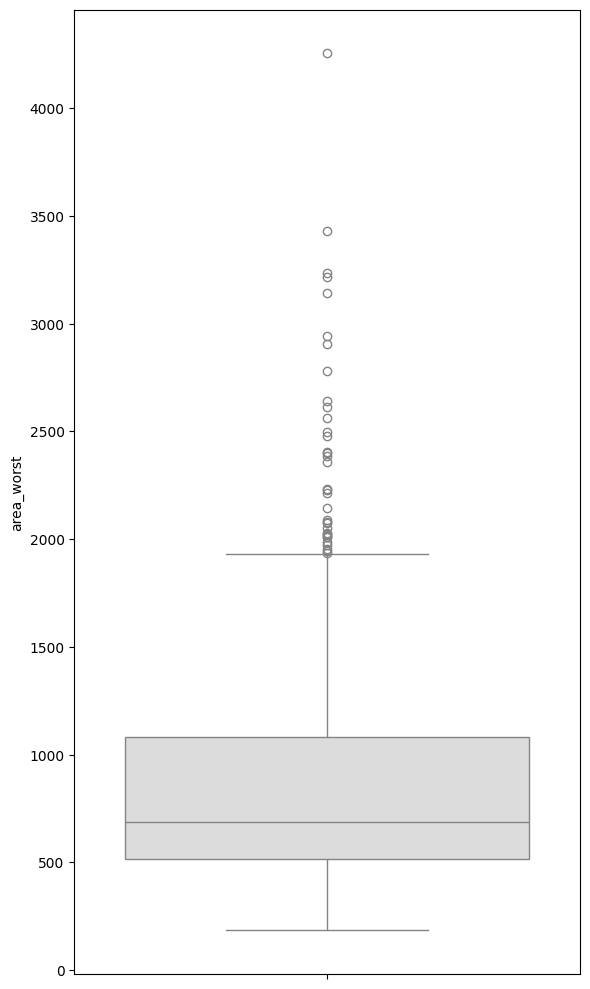

C:\Users\Dell\AppData\Local\Temp\ipykernel_7592\3408208058.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot( y=df[feature], palette=("coolwarm"))


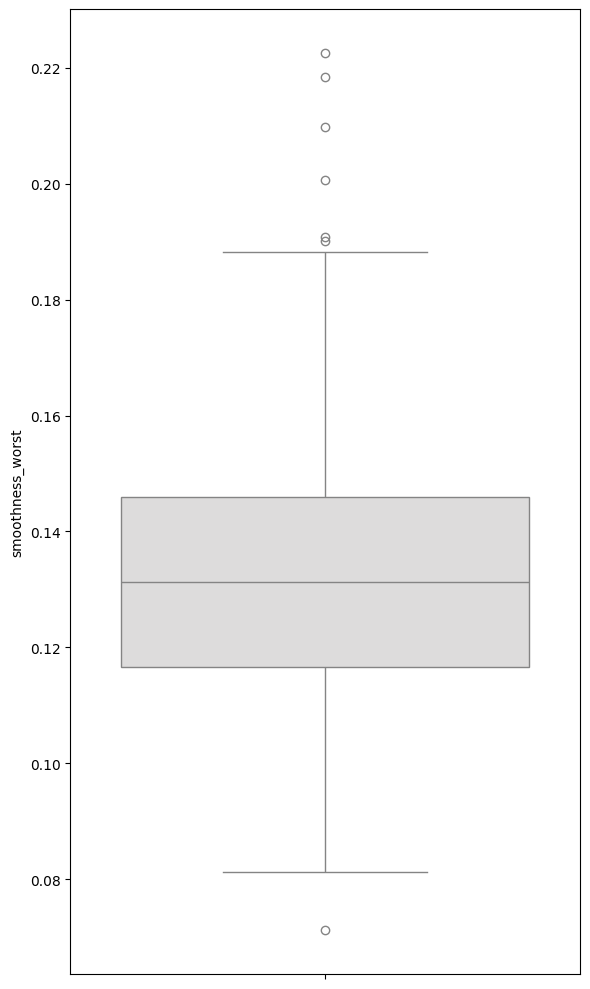

C:\Users\Dell\AppData\Local\Temp\ipykernel_7592\3408208058.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot( y=df[feature], palette=("coolwarm"))


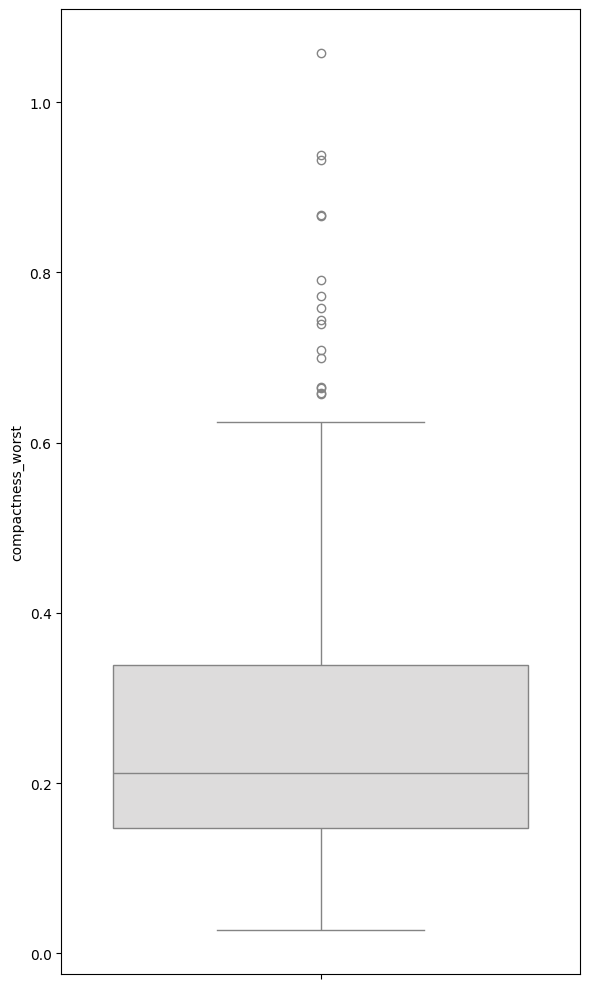

C:\Users\Dell\AppData\Local\Temp\ipykernel_7592\3408208058.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot( y=df[feature], palette=("coolwarm"))


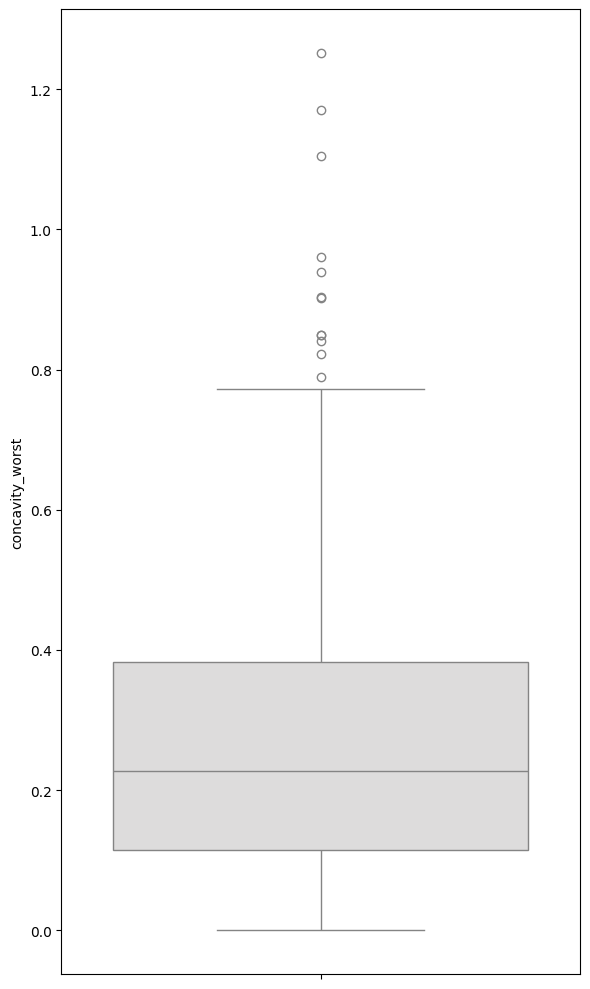

C:\Users\Dell\AppData\Local\Temp\ipykernel_7592\3408208058.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot( y=df[feature], palette=("coolwarm"))


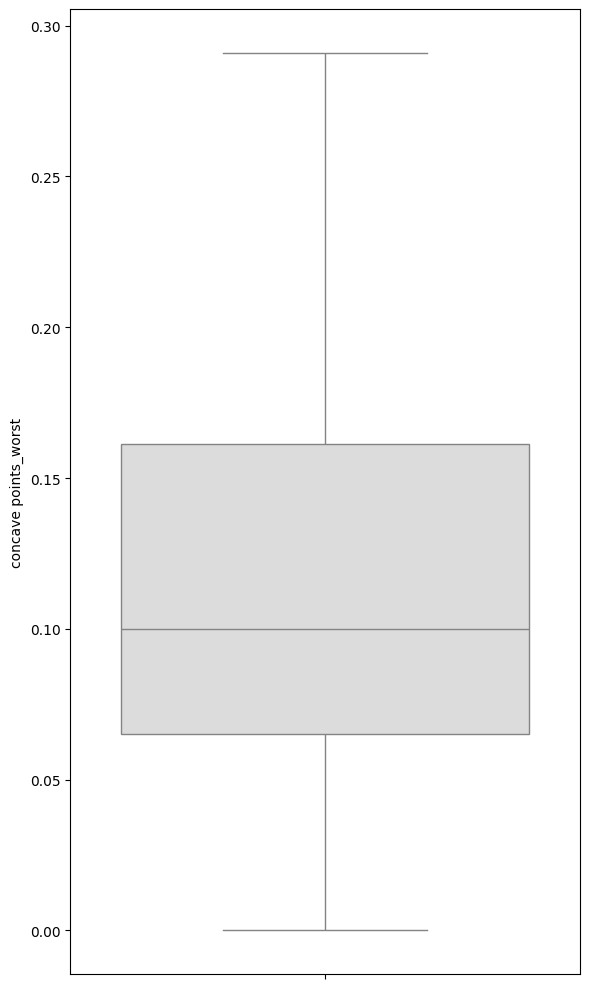

C:\Users\Dell\AppData\Local\Temp\ipykernel_7592\3408208058.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot( y=df[feature], palette=("coolwarm"))


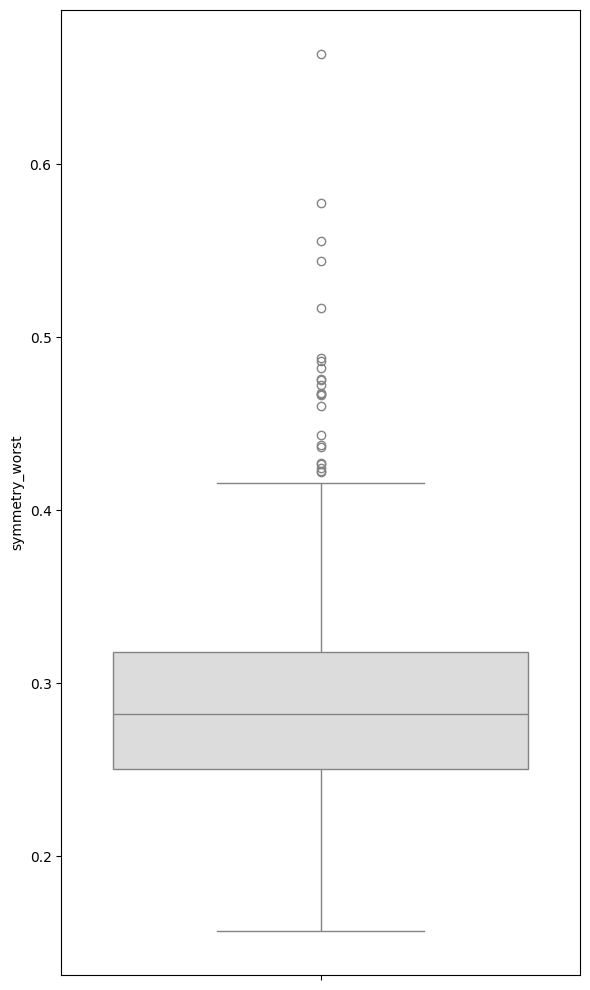

C:\Users\Dell\AppData\Local\Temp\ipykernel_7592\3408208058.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot( y=df[feature], palette=("coolwarm"))


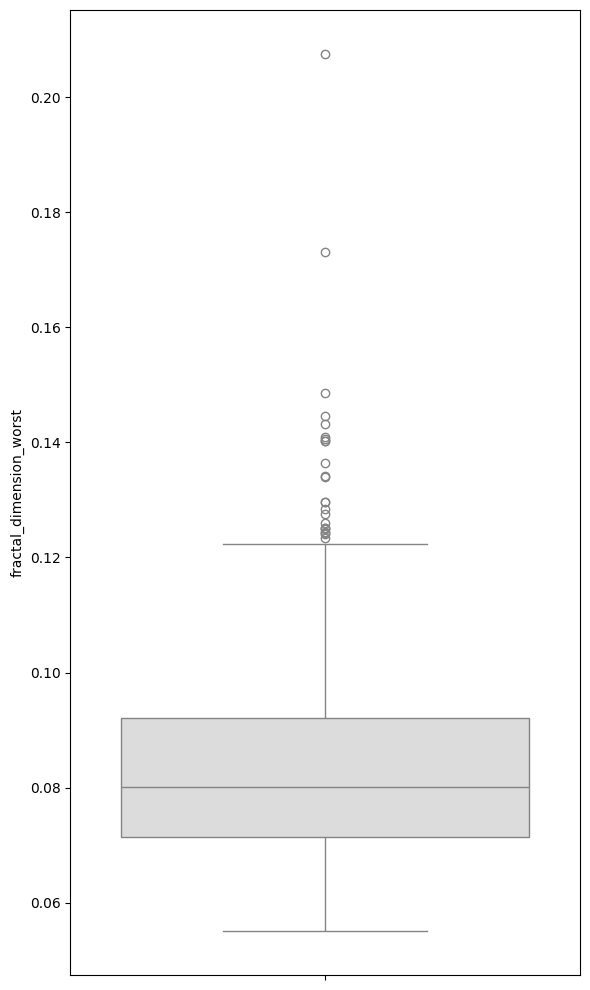

In [50]:

columns = ['radius_mean','texture_mean', 'perimeter_mean','area_mean','smoothness_mean','compactness_mean','concavity_mean','concave points_mean',
'symmetry_mean','fractal_dimension_mean','radius_se','texture_se','perimeter_se','area_se','smoothness_se','compactness_se','concavity_se','concave points_se','symmetry_se','fractal_dimension_se',
 'radius_worst',
 'texture_worst',
 'perimeter_worst',
 'area_worst',
 'smoothness_worst',
 'compactness_worst',
 'concavity_worst',
 'concave points_worst',
 'symmetry_worst',
 'fractal_dimension_worst']



for feature in columns:
    plt.figure(figsize=(6, 10))
    sns.boxplot( y=df[feature], palette=("coolwarm"))
    plt.tight_layout()
    plt.show()


In [43]:


for col in columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

In [54]:
corr_matrix=df.corr()

In [55]:
corr_matrix['diagnosis'].sort_values(ascending=False)


diagnosis                  1.000000
concave points_worst       0.793566
perimeter_worst            0.782914
concave points_mean        0.776614
radius_worst               0.776454
perimeter_mean             0.742636
area_worst                 0.733825
radius_mean                0.730029
area_mean                  0.708984
concavity_mean             0.696360
concavity_worst            0.659610
compactness_mean           0.596534
compactness_worst          0.590998
radius_se                  0.567134
perimeter_se               0.556141
area_se                    0.548236
texture_worst              0.456903
smoothness_worst           0.421465
symmetry_worst             0.416294
texture_mean               0.415185
concave points_se          0.408042
smoothness_mean            0.358560
symmetry_mean              0.330499
fractal_dimension_worst    0.323872
compactness_se             0.292999
concavity_se               0.253730
fractal_dimension_se       0.077972
symmetry_se               -0

In [56]:
X=df[['concave points_worst','perimeter_worst','concave points_mean','radius_worst','perimeter_mean','area_worst','radius_mean','area_mean','concavity_mean','concavity_worst','compactness_mean','compactness_worst','radius_se','perimeter_se','area_se','texture_worst','smoothness_worst','symmetry_worst','texture_mean','concave points_se','smoothness_mean','symmetry_mean']]
y=df['diagnosis']

In [13]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: diagnosis, dtype: int64

In [14]:
y

0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: diagnosis, Length: 569, dtype: int64

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [58]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB



In [59]:
pipeline={
    'KNN':Pipeline([
        ('scalar',StandardScaler()),
        ('classifier',KNeighborsClassifier(n_neighbors=3))
    ]),
    'Decsion tree':Pipeline([
        ('scalar',StandardScaler()),
        ('classifier',DecisionTreeClassifier(max_depth=5,random_state=42, splitter='random',criterion='entropy'))
    
    ]),
    'Naive Byes':Pipeline([
        ('scalar',StandardScaler()),
        ('classifier',GaussianNB(var_smoothing=1e-8))
    ])
}

In [60]:
best_accuracy=0
best_model=None
best_model_name=None
for name,model in pipeline.items():
    print(name)
    model.fit(X_train,y_train)
    Train_pred=model.predict(X_train)
    Test_pred=model.predict(X_test)
    Train_accuracy=accuracy_score(Train_pred,y_train)
    Test_accuracy=accuracy_score(Test_pred,y_test)
    print('Training Accuracy:', Train_accuracy)
    print('Testing Accuracy:', Test_accuracy)
   
    if Test_accuracy > best_accuracy:
            best_accuracy = Test_accuracy
            best_model = model
            best_model_name = name

print("\nBest Model:")
print(f"Model: {best_model_name}")
print(f"Accuracy: {best_accuracy:.4f}")      

KNN
Training Accuracy: 0.9802197802197802
Testing Accuracy: 0.9473684210526315
Decsion tree
Training Accuracy: 0.9428571428571428
Testing Accuracy: 0.8947368421052632
Naive Byes
Training Accuracy: 0.9362637362637363
Testing Accuracy: 0.9649122807017544

Best Model:
Model: Naive Byes
Accuracy: 0.9649


In [62]:

from sklearn.model_selection import GridSearchCV



param_grids = {
    'KNN': {
        'classifier__n_neighbors': [3, 5, 7, 9],
        'classifier__weights': ['uniform', 'distance']
    },
    'Decsion tree': {
        'classifier__max_depth': [3, 5, 10],
        'classifier__criterion': ['gini', 'entropy'],
        'classifier__splitter': ['best', 'random']
    },
    'Naive Byes': {
        'classifier__var_smoothing': [1e-9, 1e-8, 1e-7]
    }
}


In [63]:
results=[]
for name in pipeline:
    grid = GridSearchCV(pipeline[name], param_grids[name], cv=5, scoring='accuracy', n_jobs=-1)
    grid.fit(X_train, y_train)

    best_model = grid.best_estimator_
    train_acc = accuracy_score(y_train, best_model.predict(X_train))
    test_acc = accuracy_score(y_test, best_model.predict(X_test))
    cv_acc = grid.best_score_
    
    results.append((name, train_acc, test_acc, cv_acc, grid.best_params_))

# Create a result DataFrame
results_df = pd.DataFrame(results, columns=["Model", "Train Accuracy", "Test Accuracy", "CV Accuracy", "Best Params"])
results_df.sort_values(by="CV Accuracy", ascending=False, inplace=True)

print(results_df)


          Model  Train Accuracy  Test Accuracy  CV Accuracy  \
0           KNN        0.971429       0.956140     0.964835   
1  Decsion tree        0.993407       0.956140     0.947253   
2    Naive Byes        0.936264       0.964912     0.934066   

                                         Best Params  
0  {'classifier__n_neighbors': 7, 'classifier__we...  
1  {'classifier__criterion': 'entropy', 'classifi...  
2               {'classifier__var_smoothing': 1e-09}  


In [61]:
from sklearn.metrics import classification_report

y_pred = best_model.predict(X_test)

print(classification_report(y_test, y_pred, target_names=['Malignant','Benign']))

              precision    recall  f1-score   support

   Malignant       0.96      0.99      0.97        71
      Benign       0.98      0.93      0.95        43

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



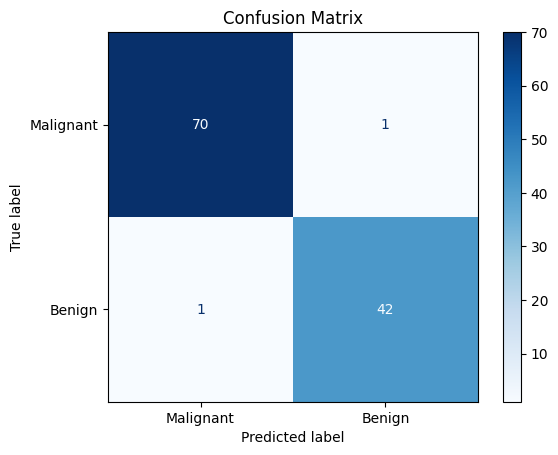

In [22]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred)
labels = ['Malignant','Benign']
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot(cmap='Blues', values_format='d')
plt.title("Confusion Matrix")
plt.show()